<a href="https://colab.research.google.com/github/Qsanti/cuTradeNet/blob/master/Models%26Demo/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo
### Example of use of the **cuTradeNet** Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

---
## Basic setup/use

### The *wealth exchange models* can be created using classes from the module **Models**

In [ ]:
from cuTradeNet import Models

### To use the trade model, you will need at least one network.
* cuTradeNet Models are compatible with *igraph.Graph* objects and *NetworkX* objects.
* I will use an example of the *igraph Graph* implementation but the usage of a *NetworkX* graph is exactly the same.

In [ ]:
import igraph as ig
import networkx as nx

* Create a graph

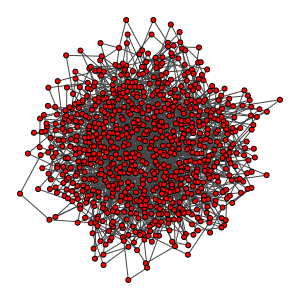

In [ ]:
g=ig.Graph.Barabasi(800,2)
ig.plot(g,bbox=(300,300),vertex_size=5)

### Choose a model to use
* in this case I'll try a Yard Sale Model, lets ask what we need to specify..

In [ ]:
Models.YardSale?

Init signature: Models.YardSale(G, f: float, wmin=1e-17)
Docstring:     
Class for a Yard Sale model on complex networks.
Runs transactions in GPU using numba, multiple graphs can be used running in parallel.
Init docstring:
Create a new YS model with the given graph or list of graphs and f value
G: igraph/ntworkx graph or list of igraph/networkx graphs
f: social protection factor
wmin: minimum wealth an agent has to have to be able to transact
File:           c:\programdata\anaconda3\lib\site-packages\cutradenet\models\yardsale.py
Type:           type
Subclasses:     


* in addition to the graph we have to specify the social protection factor $f$, and it haves (like all models) a minimun wealth $w_{min}$ that we left by default.

In [ ]:
S=Models.YardSale(g,f=0.3)

In [ ]:
print(S)

Yard Sale model: 
Graph: 1 graphs of 800 agents 
Social protection factor f: 0.3
Minimum wealth to transact: 1e-17


* We can also modify propeties of the system after is creation and betweeen iterations.

In [ ]:
S.f=0.4
S.wmin=1e-14

* Also access to wealth & risk variables

In [ ]:
W=S.wealths
R=S.risks

# by default al wealths are setted to add up one
np.sum(W)

1.0

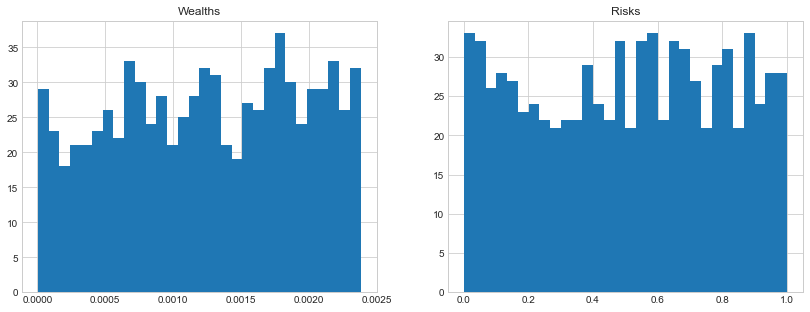

In [ ]:
fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=30)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=30)
Ax[1].set_title('Risks')

plt.show()


* To evolve the system, Monte Carlo steps (the unit of time of this dynamic) are performed. At eatch MCS, each agents trade with a random neighbor. Let's perform $1000$ MCS:

In [ ]:
S.termalize(1000)

* Let's check what happendes to the risks and wealths of the agents

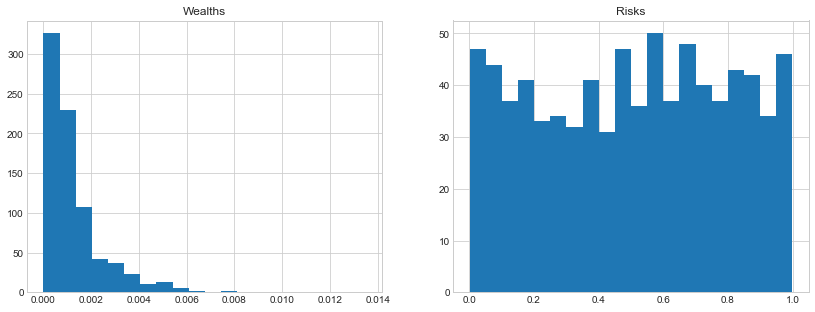

In [ ]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* Only wealths changes, cause the are the only variable thats "evolve" of each agents. Risks, links in the network, $f$, $wmin$ don't chance on the dynamic. (But can be always be changed by the user when they need to explore differents behaviors)

* You can also always ask what is current the [gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) of the system:

In [ ]:
print(S.Gini())

[0.51080424]


* Pherhaps it can be util to track an agent performance, lets track the wealth of the agent $5$, during $3000$ MCS:

In [ ]:
Wi=S.follow(1000,agent=5)

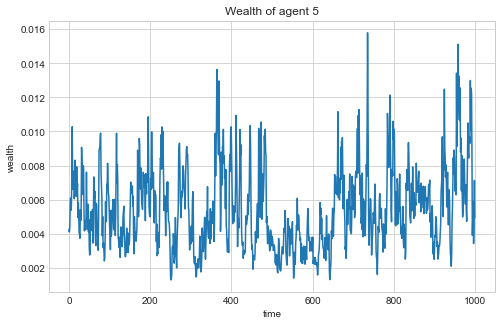

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(Wi)
ax.set_title('Wealth of agent 5')
ax.set_xlabel('time')
ax.set_ylabel('wealth')

plt.show()

* Since the wealth of te agents ar constantly fluctuating, to evaluate microscopic perfomance, could be interesting to measure the average wealth of the agents during an *epoch* of MCS. Let's get the mean wealth of the agents during $1000$ MCS:

In [ ]:
W=S.epoch(1000) 

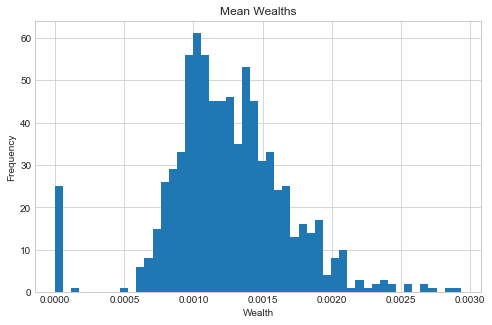

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.hist(W,bins=50)
ax.set_title('Mean Wealths')
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
plt.show()


### Reseting the system

* Whenever you want you can reset the system to its initial state (random wealth and risk)

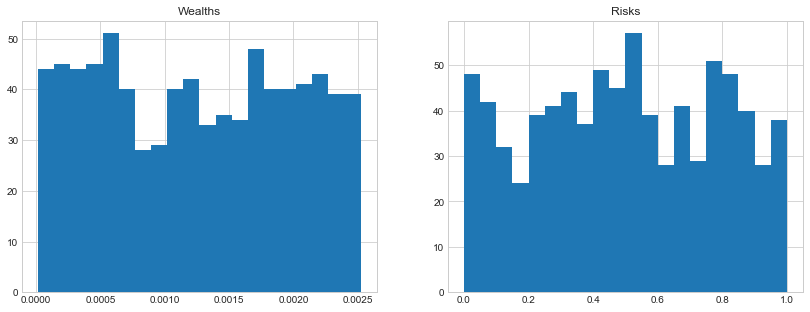

In [ ]:
S.reset()
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* And there are more reset presets:

In [ ]:
S.reset?

Signature: S.reset(wealth_type='uniform', risk_type='hetereogeneous', r=0.1)
Docstring:
Reset the model to random state in risks and wealths. 
wealth_type: 'uniform' or 'equal'
risk_type:  'hetereogeneous' or 'homogeneous'
r: if risk_type is 'homogeneous' this is the risk for all agents
File:      c:\programdata\anaconda3\lib\site-packages\cutradenet\models\yardsale.py
Type:      method


In [ ]:
S.reset(wealth_type='equal',risk_type='homogeneous',r=0.5)

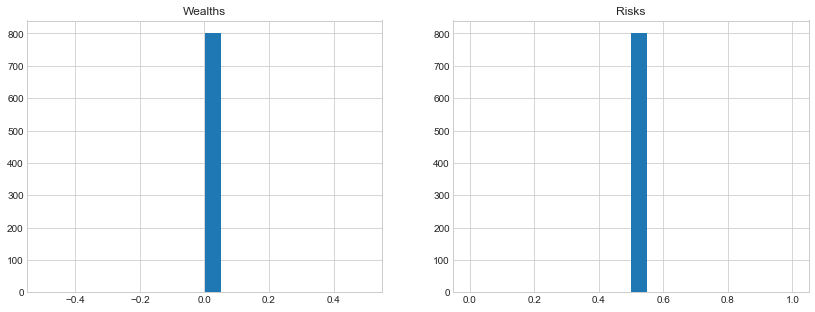

In [ ]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* O also you can modify specific agents wealth and risk, usin index

In [ ]:
S.set_risk_by_idx([0,1,2,3,5,6,7,8,9,10],0.1)
S.set_wealth_by_idx([0,1,2,3,5,6,7,8,9,10],[0,.1,.2,.3,.5,.6,.7,.8,.9,1])

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


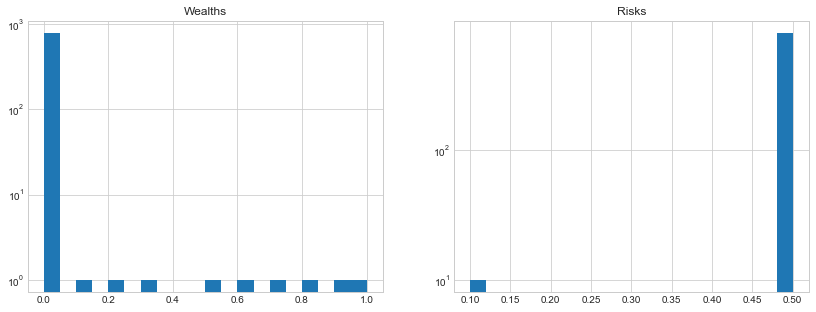

In [ ]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[0].set_yscale('log')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')
Ax[1].set_yscale('log')


plt.show()

---
## Ensemble of systems (*parallell* runs of graphs)

* One of the main features of this implementation is the ability to run *ensembles* of systems, in parallel, to easy get statistics of the system.

* Just crate the system with a list of graphs intead of a simple graph.

In [ ]:
Graphs=[ig.Graph.Barabasi(1000,2) for i in range(28)]

* Let's try a MergerSpinoff model

In [ ]:
S=Models.MergerSpinoff(Graphs,wmin=1e-15)
print(S)

Merger Spinoff model: 
Graph: 28 graphs of 1000 agents 
Minimum wealth to transact: 1e-15


In [ ]:
S.get_graphSize()

(1000, 28)

In [ ]:
S.termalize(1000)

* Note that now risk an wealth properties are arrays of (Graphs x Agents) size

In [ ]:
S.wealths.size #28x1000

28000

* This lead you to easily analize distribution of system quantities

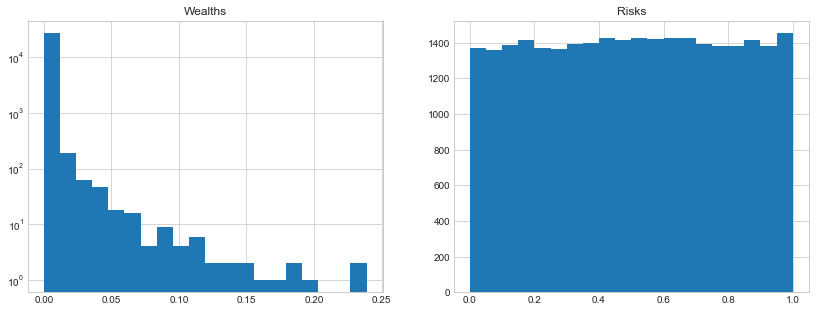

In [ ]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
#log scale
Ax[0].set_yscale('log')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

### Multiple macroscopic quantities

* Now you have multiple gini coefficients (one for each graph)

In [ ]:
print(S.Gini())

[0.8605237  0.8397043  0.89945173 0.8625813  0.84625983 0.88490254
 0.8608082  0.8036805  0.8625128  0.8717556  0.8903105  0.8537626
 0.8364982  0.8284877  0.8914083  0.8644019  0.89540654 0.87790155
 0.87401736 0.861587   0.9014767  0.8235693  0.87286776 0.82443976
 0.8985388  0.8774023  0.8199574  0.87896353]


In [ ]:
print('Average Gini: ',np.mean(S.Gini()),' Std: ',np.std(S.Gini()))

Average Gini:  0.86297065  Std:  0.026298327
